## Iodine Florecense Spectroscopy

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

read data collected tron NI labview

In [48]:
df = pd.read_csv('iodine run3.txt',header = None,delimiter='\t')
df2 = pd.read_csv('iodine run4 driven.txt.txt',header = None,delimiter='\t')

In [49]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,90964,0.252397,0.245377,0.257411,0.255406,0.257411,0.250057,0.244374,0.275459,0.239358,0.271449
1,90965,0.269110,0.243036,0.269778,0.240027,0.265099,0.248720,0.252732,0.254069,0.261423,0.251394
2,90966,0.262425,0.244374,0.257746,0.248720,0.263762,0.227989,0.255740,0.249389,0.252732,0.249389
3,90967,0.238690,0.260086,0.252063,0.261423,0.247383,0.250391,0.258080,0.246380,0.266102,0.242368
4,90968,0.241699,0.270112,0.239024,0.267104,0.257411,0.252397,0.248051,0.255740,0.267773,0.243371
...,...,...,...,...,...,...,...,...,...,...,...
5033,95997,0.263094,0.243371,0.274791,0.254403,0.261423,0.255740,0.258414,0.255406,0.242702,0.261423
5034,95998,0.261757,0.233339,0.250057,0.229661,0.254737,0.256074,0.244039,0.256074,0.243371,0.261757
5035,95999,0.244708,0.244374,0.246380,0.265099,0.236683,0.260754,0.242368,0.256743,0.242368,0.250726
5036,96000,0.240696,0.259417,0.235680,0.243371,0.243705,0.245377,0.249389,0.237686,0.263094,0.227320


In [50]:
# relabel data columns
def relabel(dataframe):
    for i in range(0,12):
        if i == 0:
            dataframe.rename(columns = {i:'Wavenumber'}, inplace = True)
        else:
            dataframe.rename(columns = {i:'Sample'+str(i)}, inplace = True)

In [51]:
relabel(df)
df

,Wavenumber,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10
0,90964,0.252397,0.245377,0.257411,0.255406,0.257411,0.250057,0.244374,0.275459,0.239358,0.271449
1,90965,0.269110,0.243036,0.269778,0.240027,0.265099,0.248720,0.252732,0.254069,0.261423,0.251394
2,90966,0.262425,0.244374,0.257746,0.248720,0.263762,0.227989,0.255740,0.249389,0.252732,0.249389
3,90967,0.238690,0.260086,0.252063,0.261423,0.247383,0.250391,0.258080,0.246380,0.266102,0.242368
4,90968,0.241699,0.270112,0.239024,0.267104,0.257411,0.252397,0.248051,0.255740,0.267773,0.243371
...,...,...,...,...,...,...,...,...,...,...,...
5033,95997,0.263094,0.243371,0.274791,0.254403,0.261423,0.255740,0.258414,0.255406,0.242702,0.261423
5034,95998,0.261757,0.233339,0.250057,0.229661,0.254737,0.256074,0.244039,0.256074,0.243371,0.261757
5035,95999,0.244708,0.244374,0.246380,0.265099,0.236683,0.260754,0.242368,0.256743,0.242368,0.250726
5036,96000,0.240696,0.259417,0.235680,0.243371,0.243705,0.245377,0.249389,0.237686,0.263094,0.227320


In [52]:
relabel(df2)

In [57]:
mn = df.Sample10[95000-89991:96000-89991].mean()

(91000.0, 96000.0)

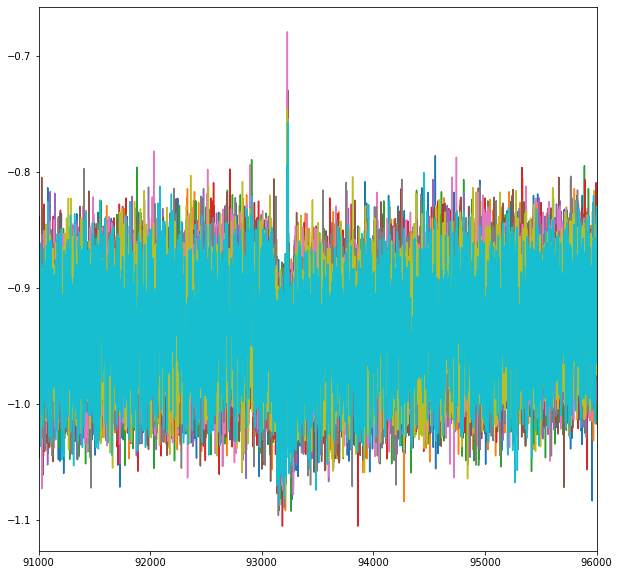

In [71]:
# plot wavenumber by voltage
plt.figure(figsize=(10,10))
for j in range(1,11):
    y = "Sample"+str(j)
    plt.plot(df.Wavenumber,-df[y]/df[y].mean() +0.065,label=j)
#     plt.plot(df2.Wavenumber,-df2[y]+df2[y].mean(),label=j)
#     plt.ylim(df.Sample1.min(),df.Sample1.max()) # largest magnitude, lowest magnitude
plt.xlim(91000,96000)
# plt.ylim(0,1)
# plt.yscale('symlog')
# plt.legend()

In [8]:
df.Sample1[1000:6000]

1000   -2.575691
1001   -2.556944
1002   -2.571260
1003   -2.552853
1004   -2.572964
          ...   
5995   -2.509560
5996   -2.512288
5997   -2.547740
5998   -2.502401
5999   -2.494219
Name: Sample1, Length: 5000, dtype: float64

In [9]:
# get wavenumber for spesific voltage
def get_wn(dataframe, val):
    array = dataframe.query(f'Sample5 == {val}')
    return array

In [10]:
# getting the largest magnitude value wavenumber
lm_val= df.Sample1.min()
get_wn(df, lm_val)

,Wavenumber,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10


In [11]:
# getting the smallest magnitude value wavenumber
sm_val= df.Sample1.max()
get_wn(df, sm_val)

,Wavenumber,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10


minus noise

In [12]:
find_peaks(df.Sample1[1000:6000])[0]

array([   1,    3,    6, ..., 4990, 4992, 4995])

In [13]:
h =df2.Sample1[94000-df.Wavenumber.min()]

In [14]:
x = (df2.Sample1[1000:6000])
x.mean
x

1000    0.174789
1001    0.180144
1002    0.177801
1003    0.169433
1004    0.172780
          ...   
5995    0.196208
5996    0.185165
5997    0.190854
5998    0.177801
5999    0.173785
Name: Sample1, Length: 5000, dtype: float64

In [15]:
def get_peaks(data,height):
    l = []
    wn = []
    for i in range(1000,len(data)-1):
        if data[i] > height and (data[i] > data[i+1]) and (data[i] > data[i-1]) and ((data[i]-data[i+1])>-0.2):
            
            l.append(data[i])
            wn.append(i+89991)

    return wn, l

In [16]:
get_peaks(get_avg(x),x.mean())

NameError: name 'get_avg' is not defined

In [ ]:
peaks, f = find_peaks(x, height=h)
print(f)
w,p  = get_peaks(x, x.mean())
plt.plot(df2.Wavenumber[1000:6000], -x)
plt.plot(w, p,'x')

# plt.plot(peaks+df.Wavenumber.min()+1000, f['peak_heights']-x.mean(), "x")
# plt.plot(peaks+df.Wavenumber.min()+1000, x[peaks], "x")
# plt.plot(np.zeros_like(x), "--", color="gray")
# plt.yscale('symlog')
plt.xlim(91000,96000)
# plt.show()

In [ ]:
def make_avg(dataf):
    blank = np.zeros(np.size(dataf.Wavenumber[1000:6000]))

    for j in range(1,11):
        name = "Sample"+str(j)
        blank += dataf[name][1000:6000]
    return blank/10


In [ ]:
get_peaks(make_avg(df2),np.mean(make_avg(df2)))

In [ ]:
for p, i in enumerate(data):
    try:
        p[i]-p[i+1]